In [1]:
#Importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Reading Calls Data table
CallsDf = pd.read_excel('CallsData.xlsx')

In [3]:
#Reading Contract Data table
ContractDf = pd.read_excel('ContractData.xlsx')

In [4]:
CallsDf.head(10)

,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Phone
0,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,91,11.01,3,2.70,415,382-4657
1,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,103,11.45,3,3.70,415,371-7191
2,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,104,7.32,5,3.29,415,358-1921
3,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,89,8.86,7,1.78,408,375-9999
4,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,121,8.41,3,2.73,415,330-6626
5,0,223.4,220.6,203.9,6.3,0,98,37.98,101,18.75,118,9.18,6,1.70,510,391-8027
6,24,218.2,348.5,212.6,7.5,3,88,37.09,108,29.62,118,9.57,7,2.03,510,355-9993
7,0,157.0,103.1,211.8,7.1,0,79,26.69,94,8.76,96,9.53,6,1.92,415,329-9001
8,0,184.5,351.6,215.8,8.7,1,97,31.37,80,29.89,90,9.71,4,2.35,408,335-4719
9,37,258.6,222.0,326.4,11.2,0,84,43.96,111,18.87,97,14.69,5,3.02,415,330-8173


In [5]:
ContractDf.head()

,Account Length,Churn,Int'l Plan,VMail Plan,State,Area Code,Phone
0,128,0,0,1,KS,415,382-4657
1,107,0,0,1,OH,415,371-7191
2,137,0,0,0,NJ,415,358-1921
3,84,0,1,0,OH,408,375-9999
4,75,0,1,0,OK,415,330-6626


In [6]:
#Merging Contract and Calls data
df = pd.merge(CallsDf, ContractDf, on="Phone")

In [7]:
df.head(8)

,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,...,Intl Calls,Intl Charge,Area Code_x,Phone,Account Length,Churn,Int'l Plan,VMail Plan,State,Area Code_y
0,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,...,3,2.70,415,382-4657,128,0,0,1,KS,415
1,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,...,3,3.70,415,371-7191,107,0,0,1,OH,415
2,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,...,5,3.29,415,358-1921,137,0,0,0,NJ,415
3,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,...,7,1.78,408,375-9999,84,0,1,0,OH,408
4,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,...,3,2.73,415,330-6626,75,0,1,0,OK,415
5,0,223.4,220.6,203.9,6.3,0,98,37.98,101,18.75,...,6,1.70,510,391-8027,118,0,1,0,AL,510
6,24,218.2,348.5,212.6,7.5,3,88,37.09,108,29.62,...,7,2.03,510,355-9993,121,0,0,1,MA,510
7,0,157.0,103.1,211.8,7.1,0,79,26.69,94,8.76,...,6,1.92,415,329-9001,147,0,1,0,MO,415


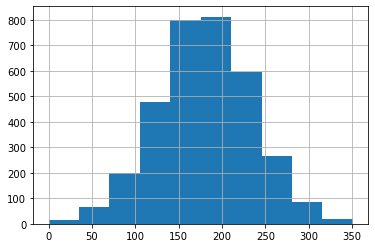

In [8]:
# Plotiing distribution of calls minuts by day
df['Day Mins'].hist();

In [9]:
# Counting number of users in the different states
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OR     78
Name: State, dtype: int64

In [10]:
#Exploring target Churn data
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [11]:
# Visualising charge data
df.columns
feat = [f for f in df.columns if 'Charge' in f]
feat

['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge']

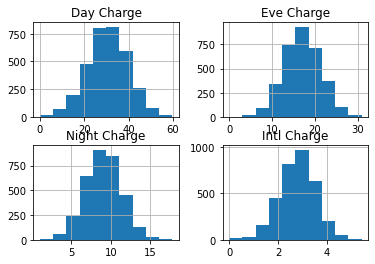

In [12]:
df[feat].hist();

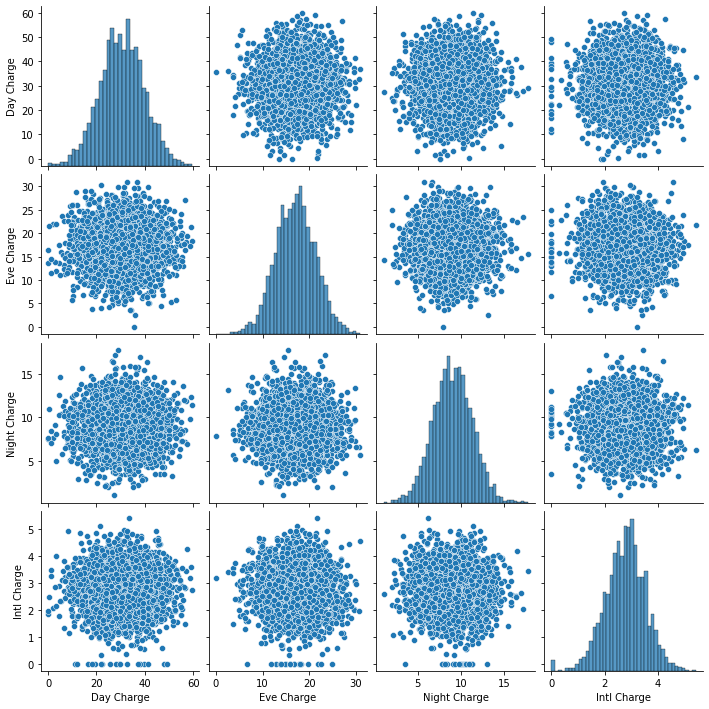

In [13]:
sns.pairplot(df[feat])

<AxesSubplot:xlabel="Int'l Plan", ylabel='count'>

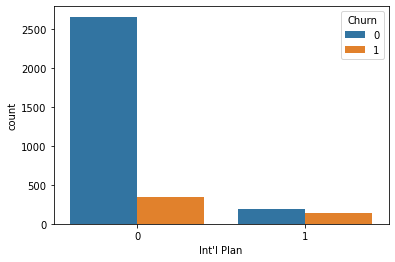

In [14]:
#How many users using international plan and his churn
sns.countplot(x= "Int'l Plan", hue='Churn', data=df )

<AxesSubplot:xlabel='CustServ Calls', ylabel='count'>

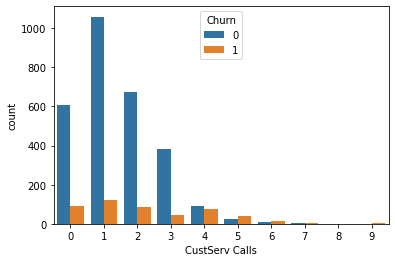

In [15]:
sns.countplot(x='CustServ Calls', hue='Churn', data=df )

In [16]:
#Using TSNE dimension reduction alghorithm with MinMax Scaler on numerical data on merged data
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
#minmax scaler
#xi = (x-min(x))/(max(x)-min(x)) 
#--->[0,1]
MinMax = MinMaxScaler()
tsne=TSNE(n_components=2, init='pca', random_state=0)
df2=df.drop('State',axis=1)
df2=df2.drop('Phone',axis=1)
df2 = MinMax.fit_transform(df2)
X_TSNE= tsne.fit_transform(df2)

In [18]:
len(X_TSNE)

3333

Text(0, 0.5, 'Component 2')

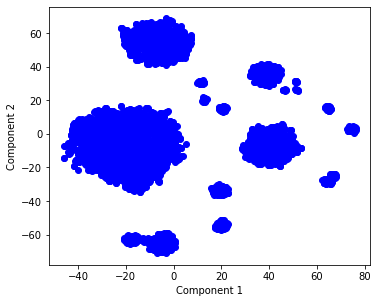

In [20]:
#TSNE represitation on merged dataset with 2 componentns
fig = plt.figure()
fig.set_figheight(19)
fig.set_figwidth(23)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

ax = fig.add_subplot(3, 3, 1)
for i in range(len(X_TSNE)):
    plt.scatter(X_TSNE[i][0], X_TSNE[i][1],c='blue')
plt.xlabel("Component 1")
plt.ylabel("Component 2")



In [26]:
#Using ISOMAP dimension reduction alghorithm with MinMax Scaler on numerical data on merged data

from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
X_Isomap = embedding.fit_transform(df2)


3333


Text(0, 0.5, 'Component 2')

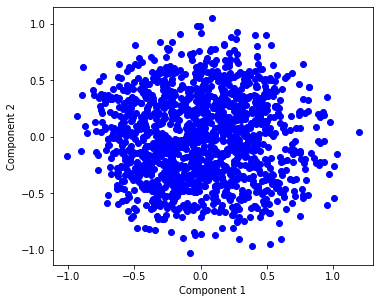

In [27]:
#ISOMAP represitation on merged dataset with 2 componentns
print(len(X_Isomap))
fig = plt.figure()
fig.set_figheight(19)
fig.set_figwidth(23)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

ax = fig.add_subplot(3, 3, 1)
for i in range(len(X_Isomap)):
    plt.scatter(X_Isomap[i][0],X_Isomap[i][1],c='blue')
plt.xlabel("Component 1")
plt.ylabel("Component 2")

Text(0, 0.5, 'Component 2')

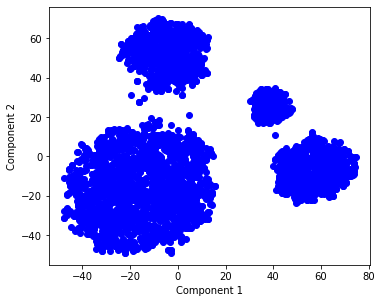

In [29]:
#Using TSNE dimension reduction alghorithm with MinMax Scaler on numerical data on Calls data
CallsDf = CallsDf.drop('Phone',axis=1)

CallsDf = MinMax.fit_transform(CallsDf)
Calls_TSNE= tsne.fit_transform(CallsDf)
fig = plt.figure()
fig.set_figheight(19)
fig.set_figwidth(23)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

ax = fig.add_subplot(3, 3, 1)
for i in range(len(Calls_TSNE)):
    plt.scatter(Calls_TSNE[i][0], Calls_TSNE[i][1],c='blue')
plt.xlabel("Component 1")
plt.ylabel("Component 2")


Text(0, 0.5, 'Component 2')

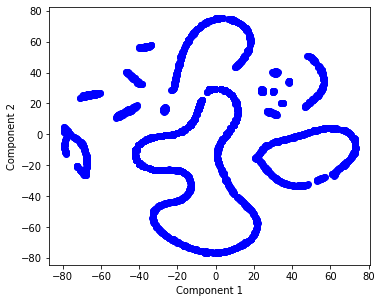

In [35]:
#Using TSNE dimension reduction alghorithm with MinMax Scaler on numerical data on contract data
ContractDf = ContractDf.drop('Phone',axis=1)

ContractDf = MinMax.fit_transform(ContractDf)
Contract_TSNE = tsne.fit_transform(ContractDf)
fig = plt.figure()
fig.set_figheight(19)
fig.set_figwidth(23)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

ax = fig.add_subplot(3, 3, 1)
for i in range(len(Contract_TSNE)):
    plt.scatter(Contract_TSNE[i][0], Contract_TSNE[i][1],c='blue')
plt.xlabel("Component 1")
plt.ylabel("Component 2")


3333


Text(0, 0.5, 'Component 2')

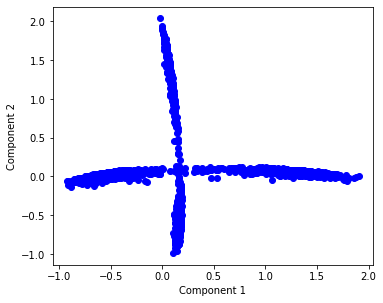

In [36]:
#Using ISOMAP dimension reduction alghorithm with MinMax Scaler on numerical data on calls data
embedding = Isomap(n_components=2)
Calls_Isomap = embedding.fit_transform(CallsDf)

print(len(Calls_Isomap))
fig = plt.figure()
fig.set_figheight(19)
fig.set_figwidth(23)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

ax = fig.add_subplot(3, 3, 1)
for i in range(len(Calls_Isomap)):
    plt.scatter(Calls_Isomap[i][0],Calls_Isomap[i][1],c='blue')
plt.xlabel("Component 1")
plt.ylabel("Component 2")

Text(0, 0.5, 'Component 2')

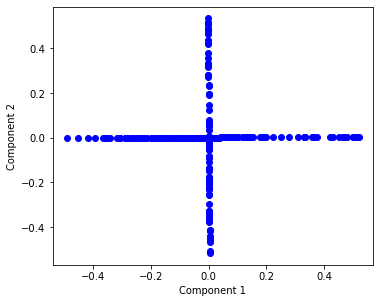

In [37]:
#Using ISOMAP dimension reduction alghorithm with MinMax Scaler on numerical data on contract
Contract_Isomap = embedding.fit_transform(ContractDf)
fig = plt.figure()
fig.set_figheight(19)
fig.set_figwidth(23)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

ax = fig.add_subplot(3, 3, 1)
for i in range(len(Contract_Isomap)):
    plt.scatter(Contract_Isomap[i][0], Contract_Isomap[i][1],c='blue')
plt.xlabel("Component 1")
plt.ylabel("Component 2")

In [40]:
#Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [51]:

#Cross validation
from sklearn.model_selection import train_test_split
x = df.drop('Churn',axis = 1)
y = x.drop('Phone',axis = 1)
X_tr = y.drop('State',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_tr,df['Churn'],test_size=0.2,random_state=0)
X_tr

,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code_x,Account Length,Int'l Plan,VMail Plan,Area Code_y
0,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,91,11.01,3,2.70,415,128,0,1,415
1,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,103,11.45,3,3.70,415,107,0,1,415
2,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,104,7.32,5,3.29,415,137,0,0,415
3,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,89,8.86,7,1.78,408,84,1,0,408
4,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,121,8.41,3,2.73,415,75,1,0,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,215.5,279.1,9.9,2,77,26.55,126,18.32,83,12.56,6,2.67,415,192,0,1,415
3329,0,231.1,153.4,191.3,9.6,3,57,39.29,55,13.04,123,8.61,4,2.59,415,68,0,0,415
3330,0,180.8,288.8,191.9,14.1,2,109,30.74,58,24.55,91,8.64,6,3.81,510,28,0,0,510
3331,0,213.8,159.6,139.2,5.0,2,105,36.35,84,13.57,137,6.26,10,1.35,510,184,1,0,510


In [52]:
# Training KNN classifier on merged data with  5 neighbours
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=4)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
#Calculating accuracy score 
score=accuracy_score(y_test,y_pred)
score

0.8710644677661169

Text(69.0, 0.5, 'Truth')

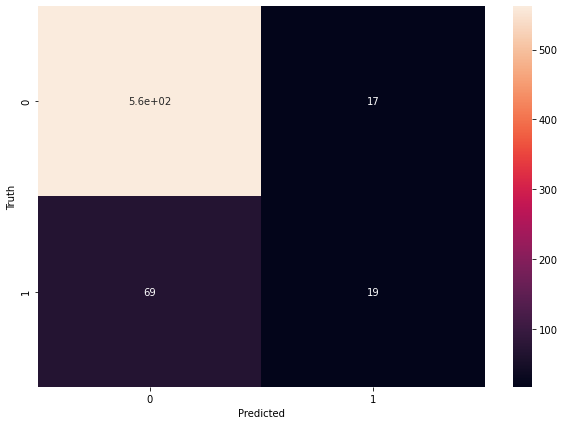

In [54]:
#Ploting confusion matrix on Churn data
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
# Training KNN classifier on merged data with  3 neighbours and calculating accuracy
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean',p=4)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.8530734632683659

Text(69.0, 0.5, 'Truth')

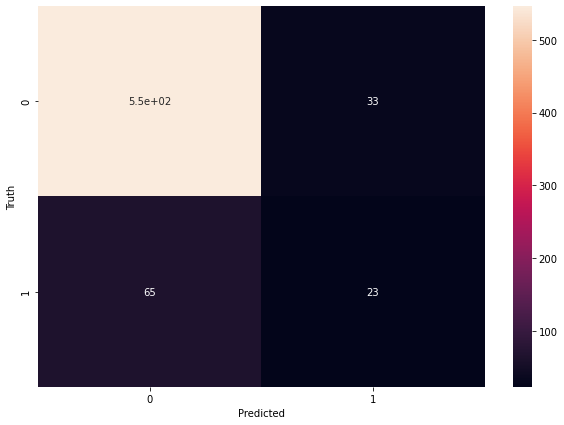

In [57]:
#Ploting confusion matrix on Churn data
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
# Training KNN classifier on merged data with  3 neighbours and calculating accuracy
knn=KNeighborsClassifier(n_neighbors=9,metric='euclidean',p=4)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.8710644677661169

Text(69.0, 0.5, 'Truth')

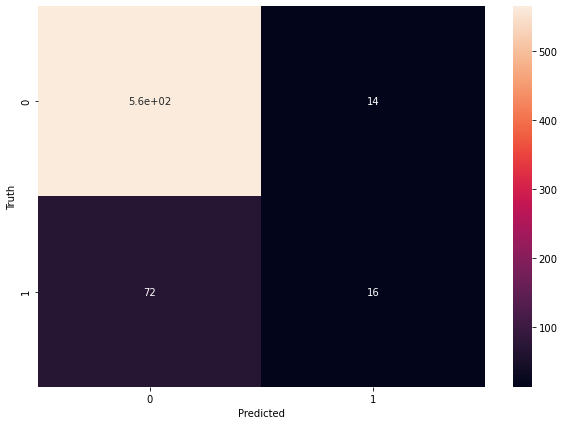

In [64]:
#Ploting confusion matrix on Churn data
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')